References:
- Applied Machine Learning in Python (Coursera, University of Michigan)

For Theory:
- Machine Learning (Coursera, Stanford)

Datasets used:
- Boston Housing Prices (from sklearn.datasets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# k-Nearest Neighbours Regression

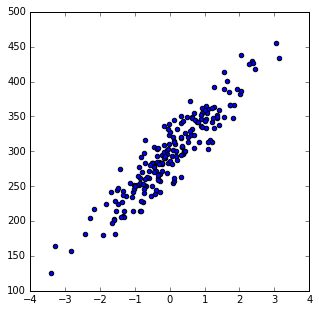

In [2]:
#prepare the dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 200, n_features = 1, n_informative = 1, noise = 20, bias = 300)
#plot the dataset
plt.figure(figsize=(5,5))
plt.scatter(X.ravel(), y, marker = 'o', s = 20)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 7)
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [4]:
#Score on the training set
train_score = knnr.score(X_train, y_train)
#Score on the test set
test_score = knnr.score(X_test, y_test)
print train_score, test_score

0.861017175184 0.856831358643


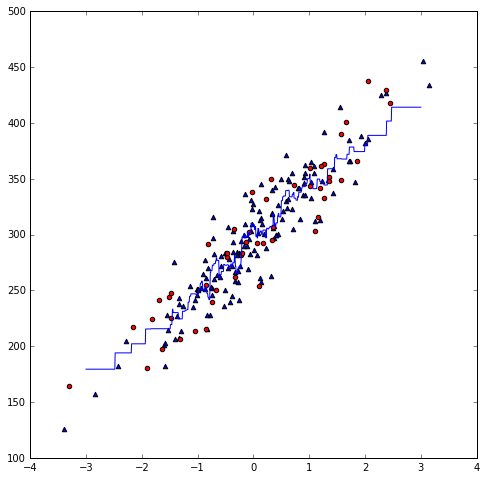

In [5]:
#plot regression curve
x_pred = np.linspace(-3,3,1000).reshape(-1,1) #to convert it into a 2-D array
y_pred = knnr.predict(x_pred)
plt.figure(figsize=(8,8))
plt.plot(x_pred,y_pred)
plt.scatter(X_train,y_train,marker='^')
plt.scatter(X_test,y_test,c='r')
plt.show()

# Linear Regression

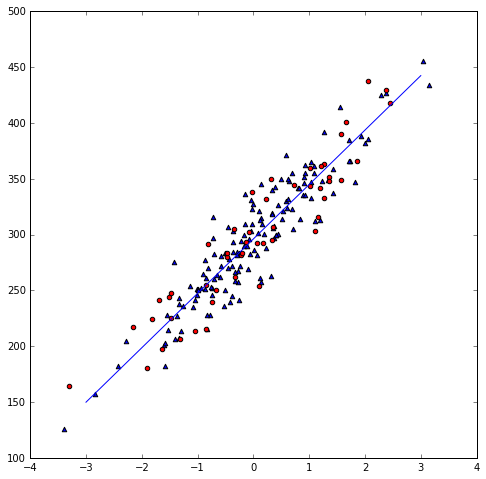

y = [ 48.76999302] x + 296.140400704
0.862900874634
0.873367300583


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
x_pred = np.linspace(-3,3,1000).reshape(-1,1) #to convert it into a 2-D array
y_pred = lr.predict(x_pred)
plt.figure(figsize=(8,8))
plt.plot(x_pred,y_pred)
plt.scatter(X_train,y_train,marker='^')
plt.scatter(X_test,y_test,c='r')
plt.show()
#equation
print "y = {} x + {}".format(lr.coef_, lr.intercept_)
#scores
print lr.score(X_train, y_train) #coefficient of determination for training data
print lr.score(X_test, y_test) #the same for test data

# Ridge Regression (regularization)

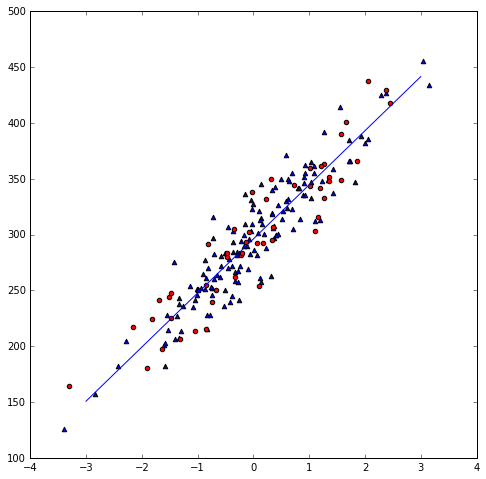

y = [ 48.48043588] x + 296.13833181
0.862900874634
0.873367300583


In [7]:
from sklearn.linear_model import Ridge
rr = Ridge().fit(X_train, y_train)
x_pred = np.linspace(-3,3,1000).reshape(-1,1) #to convert it into a 2-D array
y_pred = rr.predict(x_pred)
plt.figure(figsize=(8,8))
plt.plot(x_pred,y_pred)
plt.scatter(X_train,y_train,marker='^')
plt.scatter(X_test,y_test,c='r')
plt.show()
#equation
print "y = {} x + {}".format(rr.coef_, rr.intercept_)
#scores
print lr.score(X_train, y_train) #coefficient of determination for training data
print lr.score(X_test, y_test) #the same for test data

# Ridge v/s Linear Regression on a multi-dimensional dataset

In [8]:
boston = sklearn.datasets.load_boston()
Xb = boston['data']
yb = boston['target']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb)
boston_lin = LinearRegression().fit(Xb_train,yb_train)
boston_ridge = Ridge(alpha = 10).fit(Xb_train, yb_train)
#training scores
print boston_lin.score(Xb_train, yb_train)
print boston_ridge.score(Xb_train, yb_train)
print
#test scores
print boston_lin.score(Xb_test, yb_test)
print boston_ridge.score(Xb_test, yb_test)
print

0.76028580439
0.751049179925

0.659897432689
0.652678260478



## Feature scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

#perform feature scaling
sc = MinMaxScaler()
sc.fit(Xb_train) 
# Prevent Data leakage - NEVER train the scaler using the test data - the scaler should NOT have access to any
# part of the test data. Hence, the scaler is trained using the training data, the test data should later
# be transformed using the scaler trained on the training data
Xb_train_scaled = sc.transform(Xb_train)
Xb_test_scaled = sc.transform(Xb_test)

boston_lin_scaled = LinearRegression().fit(Xb_train_scaled, yb_train)
boston_ridge_scaled = Ridge(alpha = 2).fit(Xb_train_scaled, yb_train)
#training scores
print boston_lin_scaled.score(Xb_train_scaled, yb_train)
print boston_ridge_scaled.score(Xb_train_scaled, yb_train)
print
#test scores
print boston_lin_scaled.score(Xb_test_scaled, yb_test)
print boston_ridge_scaled.score(Xb_test_scaled, yb_test)
print

0.76028580439
0.747899014216

0.659897432689
0.665760571503



# Polynomial Regression
Using built in preprocessing utils in scikit-learn, add polynomial features to the input data, upto a certain degree

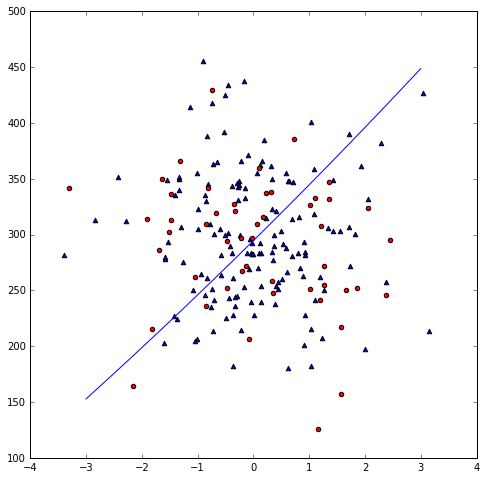

In [10]:
from sklearn.preprocessing import PolynomialFeatures
polyf = PolynomialFeatures(degree = 2)
# transform the data from the first example, adding polynomial features
# in this case, transformation using the entire data (test data) is NOT Data Leakage
Xp = polyf.fit_transform(X)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y)

lrp = LinearRegression().fit(Xp_train, yp_train)

x_pred = np.linspace(-3,3,1000).reshape(-1,1) #to convert it into a 2-D array
xp_pred = polyf.fit_transform(x_pred)

yp_pred = lrp.predict(xp_pred)

plt.figure(figsize=(8,8))
plt.plot(x_pred,yp_pred)
plt.scatter(X_train,yp_train,marker='^')
plt.scatter(X_test,yp_test,c='r')
plt.show()